In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('adult_data.csv')
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [5]:
data.groupby(['sex'])['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

In [6]:
data['native-country'].value_counts(normalize = True) * 100

United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633


In [19]:
m = data.groupby(['salary'])['age'].mean()
std = data.groupby(['salary'])['age'].std()
print(m,std)

salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64 salary
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64


In [8]:
data.groupby(['salary'])['education'].value_counts()

salary  education   
<=50K   HS-grad         8826
        Some-college    5904
        Bachelors       3134
        11th            1115
        Assoc-voc       1021
        10th             871
        Assoc-acdm       802
        Masters          764
        7th-8th          606
        9th              487
        12th             400
        5th-6th          317
        1st-4th          162
        Prof-school      153
        Doctorate        107
        Preschool         51
>50K    Bachelors       2221
        HS-grad         1675
        Some-college    1387
        Masters          959
        Prof-school      423
        Assoc-voc        361
        Doctorate        306
        Assoc-acdm       265
        10th              62
        11th              60
        7th-8th           40
        12th              33
        9th               27
        5th-6th           16
        1st-4th            6
Name: education, dtype: int64

In [9]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [10]:
data.loc[data['race'] == 'Amer-Indian-Eskimo','age'].max()

82

In [11]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [12]:
data['married-related'] = data['marital-status'].apply(lambda x: 'among married' if x.startswith('Married') else 'others')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,married-related
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,others
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,among married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,others
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,among married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,among married


In [24]:
data.groupby(['sex'])['married-related'].value_counts(normalize = True) * 100

sex     married-related
Female  others             82.582861
        among married      17.417139
Male    among married      62.143185
        others             37.856815
Name: married-related, dtype: float64

In [14]:
mhour = data['hours-per-week'].max()
data.groupby(['hours-per-week'])['salary'].value_counts()

hours-per-week  salary
1               <=50K     18
                >50K       2
2               <=50K     24
                >50K       8
3               <=50K     38
                          ..
97              >50K       1
98              <=50K      8
                >50K       3
99              <=50K     60
                >50K      25
Name: salary, Length: 173, dtype: int64

In [15]:
#loc測試
subdata = data.loc[data['hours-per-week'] == mhour,'salary']
print(subdata)
subdata.value_counts()

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: salary, Length: 85, dtype: object


<=50K    60
>50K     25
Name: salary, dtype: int64

In [18]:
subdata_jpn = data.loc[data['native-country'] == 'Japan', ['native-country','salary','hours-per-week']]
subdata_jpn.groupby(['native-country','salary'])['hours-per-week'].mean()

native-country  salary
Japan           <=50K     41.000000
                >50K      47.958333
Name: hours-per-week, dtype: float64

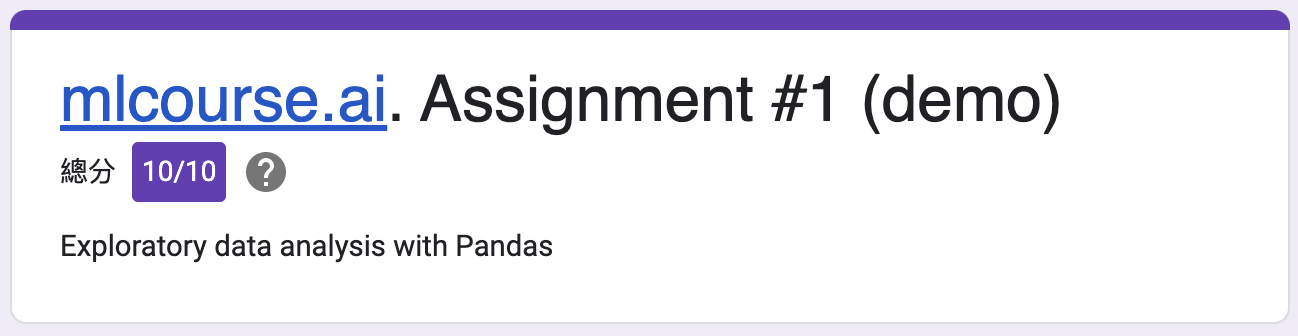

In [ ]:
'''
import pandas as pd

# 创建示例数据
data = {'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
        'gender': ['F', 'M', 'M', 'M', 'F', 'M'],
        'age': [25, 32, 18, 47, 31, 22],
        'income': [5000, 6000, 4000, 8000, 7000, 5500]}

df = pd.DataFrame(data)

# 按照 gender 分组，计算平均年龄和收入
grouped = df.groupby('gender')
result = grouped.agg({'age': 'mean', 'income': 'mean'})

# 对每个分组应用一个函数
result['income_diff'] = grouped['income'].apply(lambda x: x - x.mean())

# 根据某些条件筛选分组
result_filtered = grouped.filter(lambda x: len(x) > 2)

print(result)
print(result_filtered)
'''